In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
X = df.drop('time', axis =1)
y = df['time']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30)

In [9]:
X_train

,total_bill,tip,sex,smoker,day,size
61,13.81,2.00,Male,Yes,Sat,2
80,19.44,3.00,Male,Yes,Thur,2
119,24.08,2.92,Female,No,Thur,4
142,41.19,5.00,Male,No,Thur,5
0,16.99,1.01,Female,No,Sun,2
...,...,...,...,...,...,...
33,20.69,2.45,Female,No,Sat,4
59,48.27,6.73,Male,No,Sat,4
50,12.54,2.50,Male,No,Sun,2
141,34.30,6.70,Male,No,Thur,6


### **One Hot Encoding** Doing it before train test Split can lead to data leakage

In [10]:
### FOR TRAIN DATA

dummies1 = pd.get_dummies(X_train,dtype= int)
dummies1.drop(['total_bill',"tip", "size"], inplace = True, axis = 1) ### droppping them because we already have these in our dataset


In [11]:
X_train = pd.concat([X_train, dummies1], axis = 'columns')
X_train.drop(["sex","smoker","day"], axis = 1 , inplace = True) ### We need only numerical values in model training


In [12]:
### FOR TEST DATA

dummies2 = pd.get_dummies(X_test,dtype= int)
dummies2.drop(['total_bill',"tip", "size"], inplace = True, axis = 1)

In [13]:
X_test = pd.concat([X_test, dummies2], axis = 'columns')
X_test.drop(["sex","smoker","day"], axis = 1 , inplace = True)


In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [19]:
model.fit(X_train, y_train)

GaussianNB()

In [20]:
pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cm = confusion_matrix(pred, y_test)
cr = classification_report(pred, y_test)
acc = accuracy_score(pred, y_test)

<Axes: >

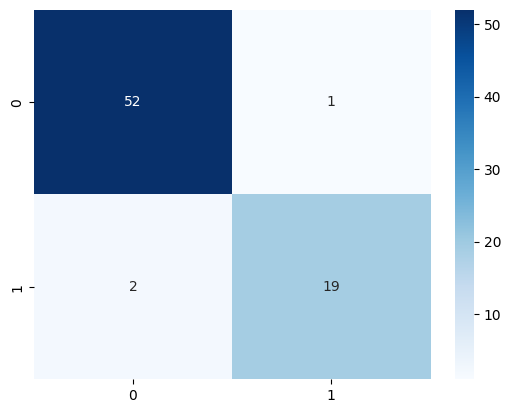

In [36]:
sns.heatmap(cm, annot=True,cmap="Blues")

In [31]:
print(cr)
print(acc)

              precision    recall  f1-score   support

      Dinner       0.96      0.98      0.97        53
       Lunch       0.95      0.90      0.93        21

    accuracy                           0.96        74
   macro avg       0.96      0.94      0.95        74
weighted avg       0.96      0.96      0.96        74

0.9594594594594594
